In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#testing to see what data entries look like
first_measure=session.query(Measurement).first()
first_measure.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f633d06640>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [10]:
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f633d50430>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(f"{recent_date.date} was the last time the data was updated.")

2017-08-23 was the last time the data was updated.


In [12]:
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

('2017-08-23',)

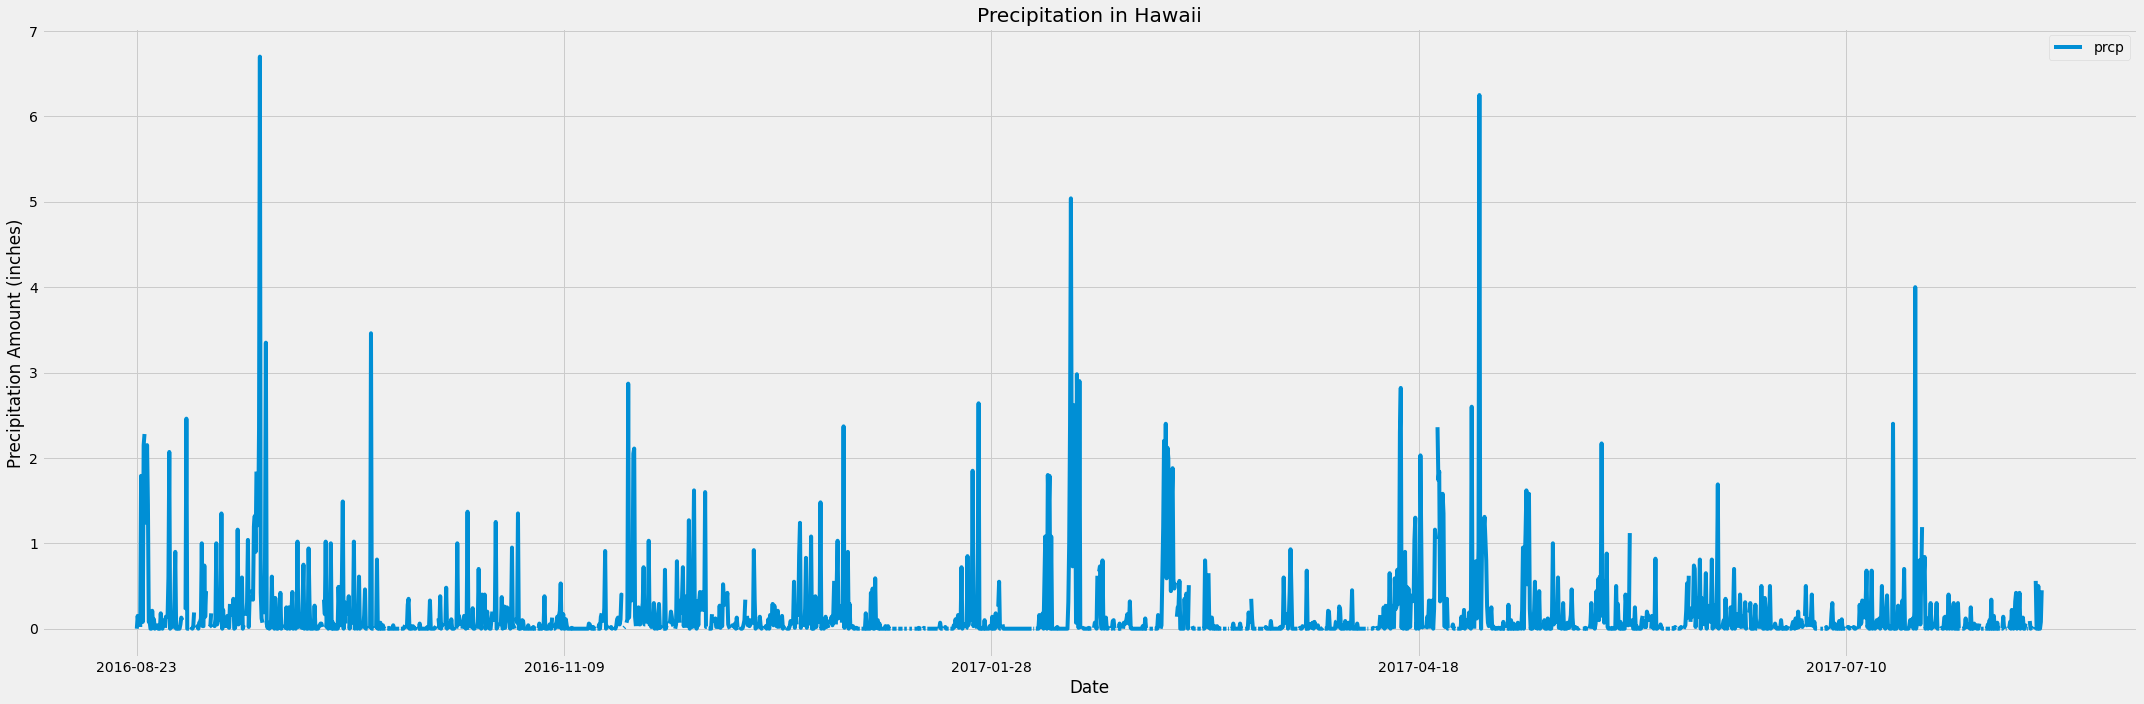

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
recent = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
        order_by(Measurement.date).all()
#beginning date is one year before the recent date. All data displayed is the previous 365 days worth of data.


# Save the query results as a Pandas DataFrame and set the index to the date column
recent_df = pd.DataFrame(recent)
recent_df.set_index("date")

# Sort the dataframe by date
recent_df.sort_values(by=["date"])

# Use Pandas Plotting with Matplotlib to plot the data
recent_df.plot(x = "date", y = "prcp", figsize = (30,10))
plt.xlabel('Date')
plt.ylabel('Precipitation Amount (inches)')
plt.title('Precipitation in Hawaii')
plt.tight_layout()
#plt.savefig("Images/precipitation_in_hawaii.png")
plt.show()




In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
recent_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations
print(f"There are {total_stations} stations.")

There are 9 stations.


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).\
                                all()
active_station
#The most active station ID has the highest value. Therefore USC00519281 from active_station[0]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(f"The lowest temperature is {low_temp}.")
print(f"The highest temperature is {high_temp}.")
print(f"The average temperature is {avg_temp}.")

The lowest temperature is [(54.0,)].
The highest temperature is [(85.0,)].
The average temperature is [(71.66378066378067,)].


Text(0.5, 0, 'Temperature')

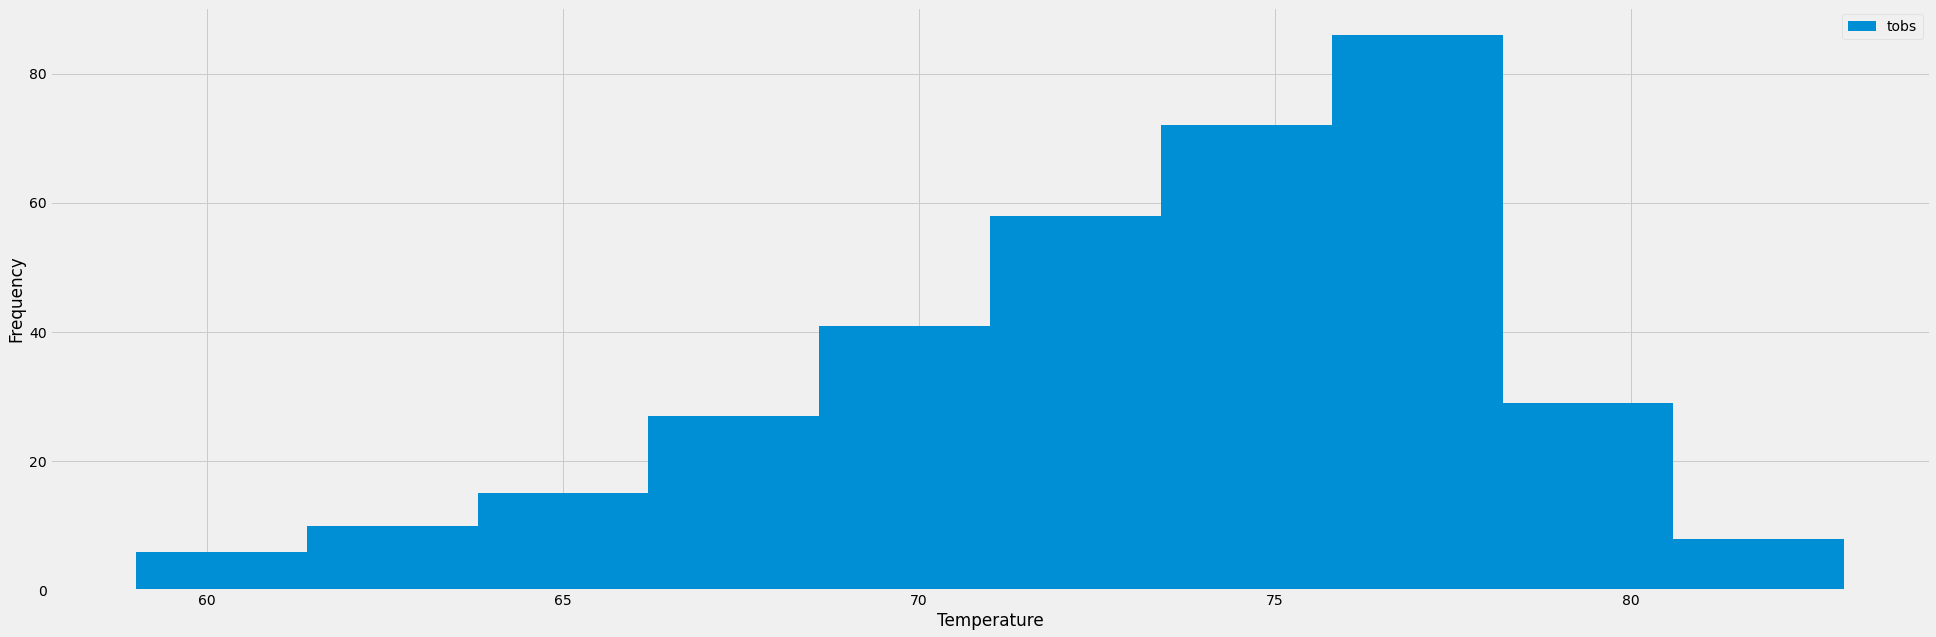

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempt_obs = pd.DataFrame(session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
        filter(Measurement.date >= "2016-08-23").all())
        #using the date from the previous section, starting from 365 days before the most recent date
tempt_obs.plot.hist(figsize = (30,10))
plt.xlabel('Temperature')

# Close session

In [19]:
# Close Session
session.close()